# Decision Trees

Decision trees are a popular machine learning method due to their ability to create understandable models. A 'tree' is automatically constructed by splitting the dataset along various dimensions, where each split creates a 'branch' in the tree

Let's look at classification with some generated data:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

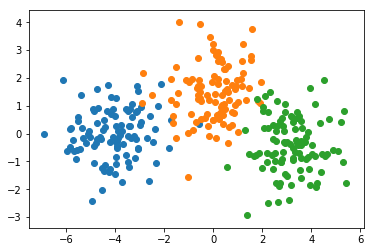

In [2]:
centers = [[-4, 0], [0, 1.5], [3, -0.5]]
X, y = make_blobs(n_samples=300, centers=centers, random_state=40)

for i in range(len(centers)):
    plt.scatter(X[y == i, 0], X[y == i, 1])

Decision trees are found in the `tree` module of scikit-learn. Let's look at the `DecisionTreeClassifier` class, which will let us classify our data. We'll first try a very shallow tree with a depth of 1.

In [3]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=1).fit(X, y)
clf.score(X, y)

0.6633333333333333

Using the `graphviz` module, we can visualize the rules of our Decision Tree

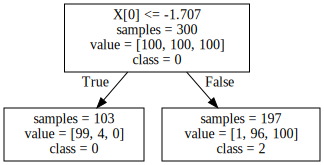

In [4]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(clf, out_file=None, class_names=['0','1','2'], impurity=False)
graph = graphviz.Source(dot_data)
graph

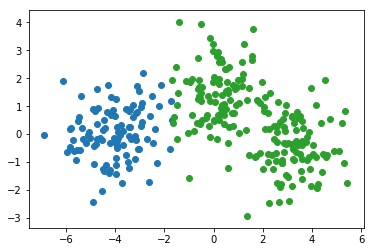

In [5]:
h = clf.predict(X)
for i in range(len(centers)):
    plt.scatter(X[h == i, 0], X[h == i, 1])

As we can see, a max_depth of 1 is not sufficient. Let's try adding another layer to our tree:

In [6]:
clf = DecisionTreeClassifier(max_depth=2).fit(X, y)
clf.score(X, y)

0.96

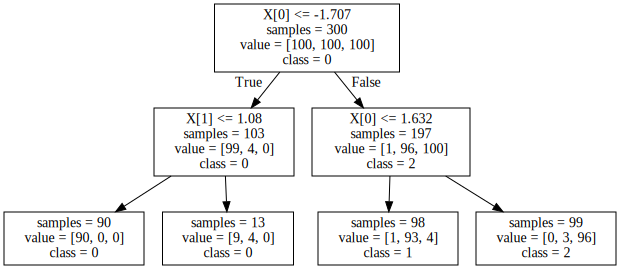

In [7]:
dot_data = export_graphviz(clf, out_file=None, class_names=['0','1','2'], impurity=False)
graph = graphviz.Source(dot_data)
graph

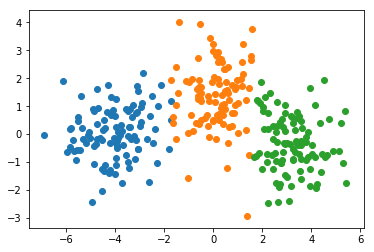

In [8]:
h = clf.predict(X)
for i in range(len(centers)):
    plt.scatter(X[h == i, 0], X[h == i, 1])

If we do not specify a max depth, the Decision Tree algorithm will decide a stopping point automatically.

In [9]:
clf = DecisionTreeClassifier().fit(X, y)
clf.score(X, y)

1.0

However, this can often lead to overfitting:

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = DecisionTreeClassifier().fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.9466666666666667)

# Regression

Decision trees can also be used for regression by changing the information metric used to decide how to split the tree. Let use a decision tree to fit a `sin` wave.

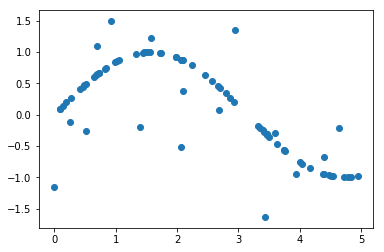

In [11]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))
plt.scatter(X, y);

In [12]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(max_depth=2).fit(X, y)
regr.score(X, y)

0.7629899797432984

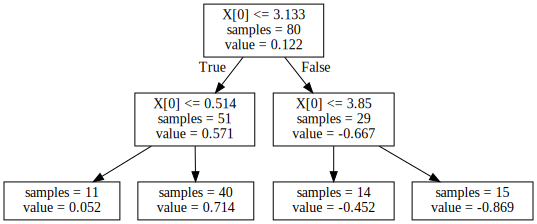

In [13]:
dot_data = export_graphviz(regr, out_file=None, impurity=False)
graph = graphviz.Source(dot_data)
graph

In [14]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
h = regr.predict(X_test)

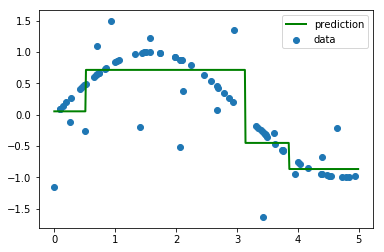

In [15]:
plt.scatter(X, y, label='data')
plt.plot(X_test, h, color='g', label='prediction', linewidth=2)
plt.legend();

Let's increase the max depth and see if this gets better

In [16]:
regr_md5 = DecisionTreeRegressor(max_depth=5).fit(X, y)
(regr.score(X, y), regr_md5.score(X, y))

(0.7629899797432984, 0.9538725108408801)

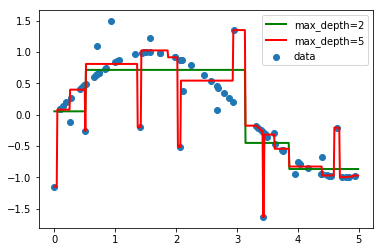

In [17]:
h_md5 = regr_md5.predict(X_test)
plt.scatter(X, y, label='data')
plt.plot(X_test, h, color='g', label='max_depth=2', linewidth=2)
plt.plot(X_test, h_md5, color='r', label='max_depth=5', linewidth=2)
plt.legend();